# Introduction to neural network classification with Tensorflow
**Classification:** Is where  you try to classify something as one thing or another.
1. Binary Classification
2. Multiple Classification
3. Multilabel Classification



# Creating data to view and fit


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

2023-03-05 17:49:00.428893: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 17:49:00.428928: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 17:49:01.366050: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-05 17:49:01.366140: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-05 17:49:01.366160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
from sklearn.datasets import make_circles

#make 100 examples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
#check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#check labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is a littel hard to understand now.Lets Visualize it !


In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


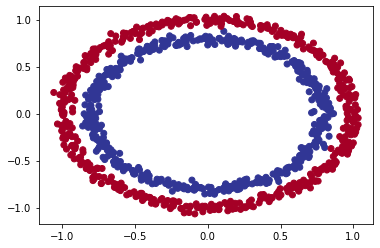

In [6]:
#visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

## Input & Output  shapes


In [7]:
#check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
#how many samples we're working  with
len(X),len(y)

(1000, 1000)

In [9]:
#view the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling


The steps in modelling with TensorFlow are :
1. Create or import a model
2. Compile the model
3. Fit the model 
4. Evaluate the model
5. Tweak
6. Evalute
.
.
.

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

In [11]:
from tensorflow.keras.layers import Flatten

In [12]:
#set random seed
tf.random.set_seed(42)

model=tf.keras.Sequential([
    Flatten(),
    Dense(units=5),
    Dense(units=2)
])

#compile it
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )


#fit model
model.fit(X,
          y,
          epochs=5
)

2023-03-05 17:49:03.891156: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 17:49:03.891189: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 17:49:03.891214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1567 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8300 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6188 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.5485 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.5160 - accuracy: 0.4920


In [13]:
#improving model by training for longer
model.fit(X,y,epochs=200,verbose=0)

In [14]:
model.evaluate(X,y)#not right to evelaute with trainning data but just for experimental sake


32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5240


[0.6931997537612915, 0.5239999890327454]

since we're working on binary classification problem and our model is getting around ~50% accuracy .. it's performing as if it's guessing.


So let's step thing up a notch and add an extra layer


#model 1

In [15]:
#set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    
    Dense(units=10),
    Dense(units=2)
])

#compile it
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )


#fit model
model_1.fit(X,
          y,
          epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.6393 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5975 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5010
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4940
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4710
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4950
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4630
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5030
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4590
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4820
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5210
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4780
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5030
Epoch 93/100


The model seems to still be around a 50% accuracy so we still have to tweak
it 

# model 2

In [16]:
#seed
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    Flatten(),
    Dense(units=100),
    Dense(units=10),
    Dense(units=1)
    
])


#compile it
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
            

)

# Fit MODEL
model_2.fit(X,
           y,
           epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.8407 - accuracy: 0.4710
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5060
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4780
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4900
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5040
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5260
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4910
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5190
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4820
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4680


# Model 3

In [17]:
tf.random.set_seed(42)

#Create model
model_3=tf.keras.Sequential([
    
    Dense(units=100,activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
History = model_3.fit(X,
                     y,
                     epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.8676 - accuracy: 0.3620
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.3550
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.3630
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.3570
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4560
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5130
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5610
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5580
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6380
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6390


Text(0.5, 0, 'epochs')

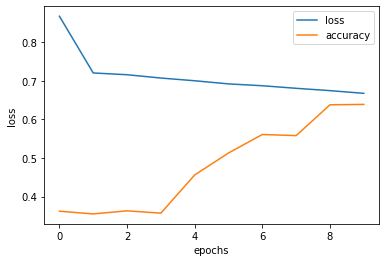

In [18]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(History.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [19]:
X.shape,y.shape

((1000, 2), (1000,))

In [20]:
model_3.evaluate(X,y)#not right to evelaute with the same training data


32/32 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6480


[0.6655392050743103, 0.6480000019073486]

# Model 4

In [21]:
tf.random.set_seed(42)

#Create model
model_4=tf.keras.Sequential([
    Dense(units=10 ,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history=model_4.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7933 - accuracy: 0.3940
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.3160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7544 - accuracy: 0.3030
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.2130
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7422 - accuracy: 0.2150
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7371 - accuracy: 0.2500
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7349 - accuracy: 0.1850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7307 - accuracy: 0.2080
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7270 - accuracy: 0.1940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7231 - accuracy: 0.2710
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9960
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9970
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9980
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9980
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9970
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9990
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9960
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9970
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9990
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9970
Epoch 93/100


In [22]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9940


[0.05507226288318634, 0.9940000176429749]

Text(0.5, 0, 'epochs')

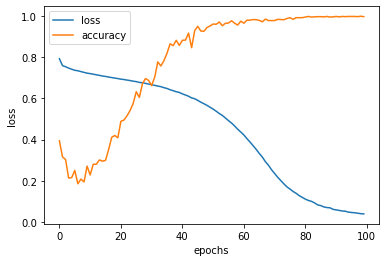

In [23]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Model 5


In [24]:
tf.random.set_seed(42)

#Create model
model_5=tf.keras.Sequential([
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history5=model_5.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


In [25]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [26]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                30        
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


# visualize some of its predictions


In [27]:
model_4.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[ 1.10285699e+00],
       [ 1.19246161e+00],
       [ 7.71950424e-01],
       [ 1.06177640e+00],
       [-3.46147537e-01],
       [ 7.72971272e-01],
       [ 1.02884579e+00],
       [ 1.25379908e+00],
       [ 8.24489415e-01],
       [-3.28963876e-01],
       [ 5.72562873e-01],
       [-1.51136398e-01],
       [ 8.69731426e-01],
       [ 9.52319026e-01],
       [ 7.58446395e-01],
       [ 9.66332734e-01],
       [-4.65259075e-01],
       [ 8.94062221e-01],
       [ 9.24460113e-01],
       [-3.40908289e-01],
       [ 1.17795610e+00],
       [-4.24551129e-01],
       [-4.25650239e-01],
       [ 1.04757631e+00],
       [-2.81332374e-01],
       [-7.08690882e-02],
       [-4.70731735e-01],
       [ 6.84220552e-01],
       [ 8.06856513e-01],
       [ 1.02944160e+00],
       [-2.21751928e-02],
       [-2.87705660e-01],
       [ 1.13020396e+00],
       [-2.73852468e-01],
       [-7.62366652e-01],
       [-5.75923324e-01],
       [ 8.90278459e-01],
       [ 1.03892243e+00],
       [ 9.6

# Visualization

 ***To viusalise our models prediction lets create a function 'plot_descision_boundary()', this function will:***
1. Take in a trained model , features X and label y
2. create a meshgred of the difference X values
3. make predictions accross the meshgid
4. Plot the predictions as  wel as a line  between  zones(where each unique class falls)

# useful modules
* meshgrid
* np.linspace
* np.c_


In [28]:
import numpy as np

In [29]:



def plot_decision_boundary(model,X,y):
    '''
    Plots the decision boundary created by a model prediction on X.
    '''
    #Define the axis boundaries of the  plot and create a meshgrid
    x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    
    #create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()]#stacks 2D arr together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    
    #check for multi-class
    if len(y_pred[0])>1:
        print('doing multiclass classification')
        #we have to reshape our prediction to get them ready fro plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    #Plot tthe decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:,1], c=y , s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
     

In [30]:
x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [31]:
y_pred=model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


In [32]:
y_pred.shape

(1000, 1)

313/313 [==============================] - 0s 989us/step
doing binary classification


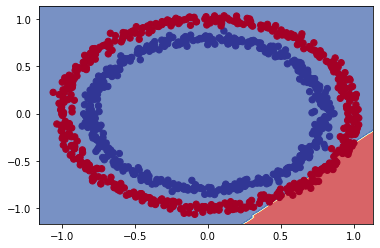

In [33]:
#check out the decisions predictions our model is making
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

# Regression trial
***regression data***

In [34]:
#lets see if our model can be used for a regression problem


tf.random.set_seed(42)

#create Some reggression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100 ,1100, 5) # y = X + 100

#spliting our regression data into training and test
X_reg_train = X_regression[:150] #first 150
X_reg_test = X_regression[150:]#last 150
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]





In [35]:
X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

# FITTING ERROR

In [36]:
#Fit  our model to the regression data
model_2.fit(X_reg_train,
           y_reg_train,  
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [37]:
X_reg_train.shape,y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

****We compiled  our model for a binary classification problem***
***But ...we're now working on a regression prob, lets change  the model  to suit our data***

In [39]:
# Set sed
tf.random.set_seed(42)

#create model
reg_model_1 = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,)),
    Dense(units=10),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

reg_model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
reg_model_1.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 452.3074 - mae: 452.3074
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 357.7128 - mae: 357.7128
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 266.7798 - mae: 266.7798
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 171.5758 - mae: 171.5758
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 73.9068 - mae: 73.9068
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 63.7212 - mae: 63.7212
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 78.8190 - mae: 78.8190
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 58.5891 - mae: 58.5891
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 44.4232 - mae: 44.4232
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 51.1998 - mae: 51.1998
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 4ms/step - loss: 38.9298 - mae: 38.9298
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 39.0455 - mae: 39.0455
Epoch 89/100
5/5 [==============================] - 0s 5ms/step - loss: 38.7740 - mae: 38.7740
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.7265 - mae: 38.7265
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 38.6623 - mae: 38.6623
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 38.6950 - mae: 38.6950
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 39.1343 - mae: 39.1343
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3763 - mae: 38.3763
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8372 - mae: 38.8372
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 38.6167 - mae: 38.6167
Epoch 97/100
5/5 [==============================] - 0s 3ms/step

In [40]:
# Set sed
tf.random.set_seed(42)

#create model
reg_model_2 = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

reg_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
reg_model_2.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 462.1728 - mae: 462.1728
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 438.9024 - mae: 438.9024
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 416.5379 - mae: 416.5379
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 393.3011 - mae: 393.3011
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 370.4922 - mae: 370.4922
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 348.1523 - mae: 348.1523
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 324.7497 - mae: 324.7498
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 300.1224 - mae: 300.1224
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 274.2179 - mae: 274.2179
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 245.3306 - mae: 245.3306
Epoch 11/100
5/5 [=====================

5/5 [==============================] - 0s 3ms/step - loss: 40.3941 - mae: 40.3941
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 40.3825 - mae: 40.3825
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 40.4606 - mae: 40.4606
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 40.3645 - mae: 40.3645
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 40.3612 - mae: 40.3612
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 40.2184 - mae: 40.2184
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 40.6677 - mae: 40.6677
Epoch 94/100
5/5 [==============================] - 0s 3ms/step - loss: 40.2983 - mae: 40.2983
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 40.3529 - mae: 40.3529
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 40.4847 - mae: 40.4847
Epoch 97/100
5/5 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 3ms/step


NameError: name 'lables' is not defined

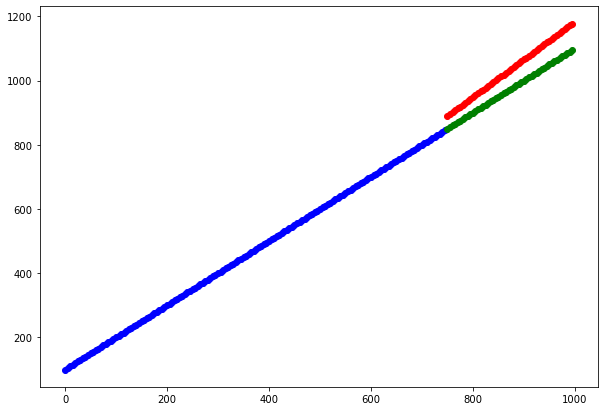

In [45]:
#Make predictions with trained  model

y_reg_pred = reg_model_1.predict(X_reg_test)

#plot the model's  predictions against our regression data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c='b' , label="Training data")
plt.scatter(X_reg_test,y_reg_test, c='g' , label="Test data")
plt.scatter(X_reg_test,y_reg_pred, c='r' , label="Predictions")
plt.legend()

# Non-linearity